In [170]:
from numpy import arange, exp, real, ones, conj, shape, append, pi, sin, abs, cos, cumsum
from numpy.random import randn
from scipy.signal import unit_impulse, deconvolve
from scipy.optimize import curve_fit
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

##  1 (Shift)

In [107]:
def conv(f,g):
  ft1= fft(f)
  ft2 = fft(g)
  return real(ifft(ft1*ft2))

In [108]:
def shift(f , a):
  #x : array
  #a : amount of shift

  L= len(f)
  g = unit_impulse(int(L), a)

  h = conv(f, g)
  
  return h, f

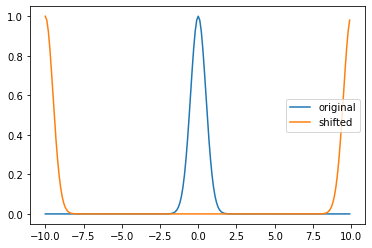

In [109]:
x = arange(-10, 10, 0.1)
f = exp(-0.5*(x)**2/0.5**2)

L= len(f)
h, f1 = shift(f, int(L/2))

plt.plot(x, f1, label= 'original')
plt.plot(x, h, label= 'shifted')
plt.legend()
plt.savefig('gauss_shift.png')
plt.show()

## 2 (Corrolation)

In [110]:
def corr(f,g):
  ft1= fft(f)
  ft2 = conj(fft(g))
  return real(ifft(ft1*ft2))

In [111]:
y = arange(-10, 10, 0.1)
m = exp(-0.5*(x)**2/0.5**2)
n = corr(m1, m1)

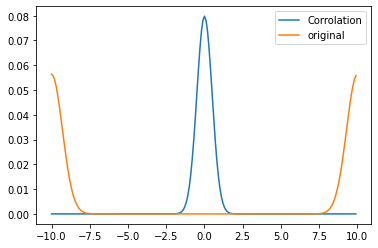

In [112]:
plt.plot(y, m1, label= 'Corrolation')
plt.plot(y, n,label= 'original')
plt.legend()
plt.savefig('corrolation.png')
plt.show()

## 3 (Shift and Corrolation!)

In [113]:
def shift_corr(f, a):
  h, f1= shift(f, a)

  # so h is the shifted one
  #h = h/h.sum()

  # take the corrolation of itself with the shited one!
  h1 = corr(f1, h)
  #h1=h1/h1.sum()
  return  h1 , f1

In [114]:
x = arange(-50, 50, 1)
f = exp(-0.5*(x)**2/0.5**2)
h1, f1= shift_corr(f, 20)

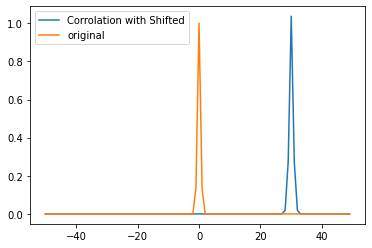

In [115]:
plt.plot(x, h1, label= 'Corrolation with Shifted')
plt.plot(x, f1, label= 'original')
plt.legend()
plt.savefig('corrolation_with_Shifted.png')
plt.show()

As I have found, in this case, the output is a gaussian with a shift, this shift depands linearly on the original shifting amount (the slope is negative).

In my case, the relation is : shift_new = -1 * shift_original + 50

## 4 (Safe Convolution)

As we want to convolute arrays of different sizes, I compare the size of arrays with each other and add sufficient number of zeros to end of the shorter one to make them have the same size (I also add a zero to end of longer one).


So this way, the size of out put array will be max (len(f), len(g))+1

In [116]:
def conv_safe(f,g):
  print('the original length of g is :' + str(len(g)))
  print('the original length of f is :' + str(len(f)))
  #j= 0
  if len(g)==len(f):
    f= append(f, 0)
    g= append(g, 0)

  if len(f) > len(g):
    for i in range(0, len(f)-len(g)+1):
      g = append(g, 0)
    f = append(f, 0)

  if len(g)>len(f):
    for i in range(0, len(g)-len(f)+1):
      f = append(f, 0)
      #j = j+1
    g = append(g, 0)
    #print(j)

  print('the new length of g is :' + str(len(g)))
  print('the new length of f is :' + str(len(f)))

  ft1= fft(f)
  ft2 = fft(g)
  return real(ifft(ft1*ft2))

In [117]:
f = exp(-0.5*(x)**2/0.5**2)
y= arange(-100, 100, 1)
g = exp(-0.5*(y)**2/0.5**2)
u= conv_safe(f,g)
print('size of output is : ' + str(len(u)))

the original length of g is :200
the original length of f is :100
the new length of g is :201
the new length of f is :201
size of output is : 201


## 5


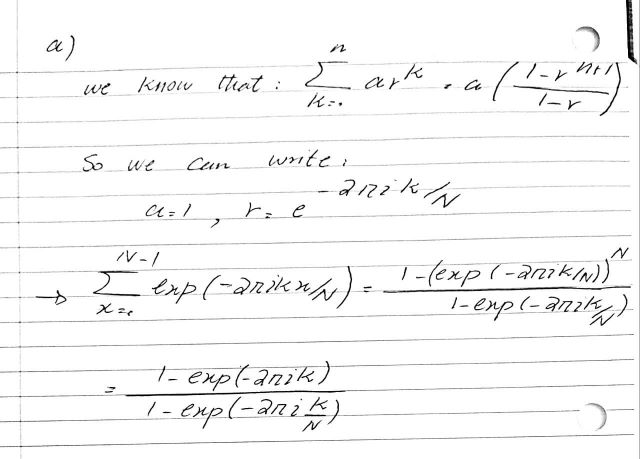

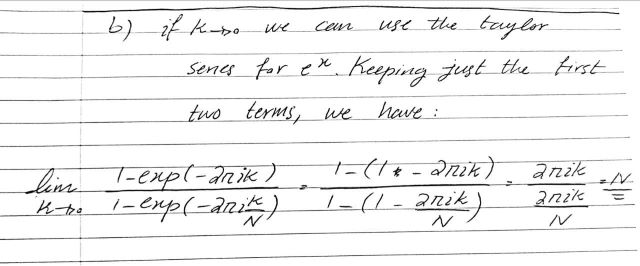



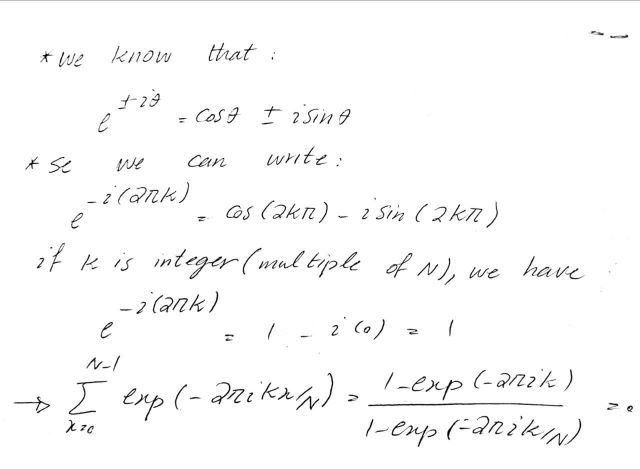

**C : finding the analytic DFT of sin(2 k pi x)**





> Indented block


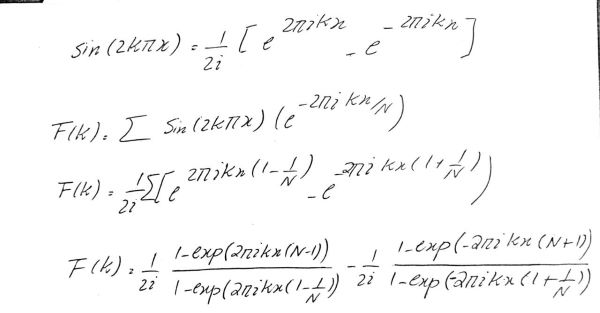

In [122]:
k = 1/(2*pi)
N = 100
def analytic():
  v= 1/(2j)*(1-exp(2j*pi*(k*N-x)))/(1-exp(2j*pi*(k-x/N))) - 1/(2j)*(1-exp(2j*pi*(-k*N-x)))/(1-exp(2j*pi*(-k-x/N)))
  return v


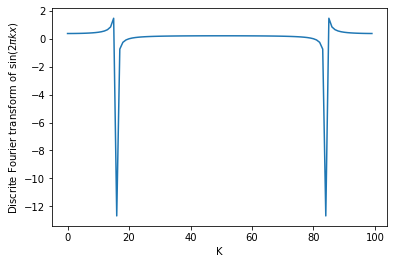

In [127]:
x = arange(0, N, 1)
f = analytic(x)

plt.plot(x, real(f))
plt.xlabel('K')
plt.ylabel('Discrite Fourier transform of $\sin(2\pi k x)$')
plt.savefig('DFT_sin.png')
plt.show()

Now I compare my analytic result to what numpy.fft gives us!

In [135]:
# I use the same values of x!
sin_x = sin(2* k * pi * x) 
sin_fft = fft(sin_x)

In [136]:
#calculating the difference!
d = abs(f - sin_fft)
max = d.max()
print('maximum difference is :' + str(max))

maximum difference is :7.418283949015283e-13


**d: *using* the window function**


In [150]:
def window (x):
  return 0.5 - 0.5 * cos((2*pi*x)/N)  

In [145]:
sin_window_fft = fft(sin_x * window(x))

In [146]:
#calculating the difference!
d_window = abs(f - sin_window_fft)
max = d_window.max()
print('maximum difference is :' + str(max))

maximum difference is :24.53704745532329


**e**

In [149]:
window_fft = fft(window(x))
print(window_fft)

[ 5.00000000e+01+0.00000000e+00j -2.50000000e+01+2.41473508e-15j
 -1.09041490e-16+1.31757938e-15j -1.88737914e-15+2.22044605e-16j
  4.17403164e-16-1.24406761e-15j -1.12656473e-15+3.85712751e-16j
 -6.56706937e-16+5.14593481e-16j -5.10659648e-16-5.89426206e-16j
  3.85638540e-16+1.52131238e-16j  4.90853887e-16+2.09859513e-16j
 -5.04605798e-16+2.85955148e-16j -7.53150362e-16-1.38767775e-16j
  3.62577995e-16-4.75573362e-16j -4.59888584e-16+7.66493769e-17j
  1.48583017e-16+8.16667610e-18j  1.97999379e-15-8.98373654e-17j
  9.69012021e-16-1.73695561e-16j -2.23346877e-16+2.22576527e-15j
 -6.57689997e-16+1.54959925e-15j -1.77635684e-15-9.39787168e-16j
  0.00000000e+00+0.00000000e+00j  8.15368630e-16+1.02262787e-16j
  1.25066481e-15-5.49247717e-16j  1.75757492e-15+1.51294857e-15j
  2.24898538e-16+6.09246395e-16j  5.20707672e-16-8.33468930e-16j
 -5.20990366e-16+1.38125380e-16j  3.49459259e-16+8.80234517e-16j
 -9.00091758e-16-6.04491733e-16j  5.12566872e-16+1.84908931e-16j
  1.16027740e-16+6.987881

## 6 (Random Walk)

In [258]:
z = arange(1, 100, 0.001)
random_walk= cumsum(randn(len(z)))

In [259]:
windowed_random_walk = random_walk * window(z)
corrolation = corr(windowed_random_walk, windowed_random_walk)
power_spectrum = (abs(fft(corrolation)))**2

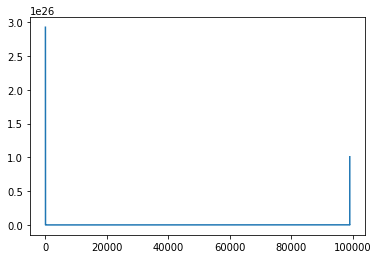

In [260]:
plt.plot(power_spectrum)
plt.savefig('rw_ps.png')

In [261]:
#finding the normalization factor
normal = power_spectrum[1]/(1/x[1])

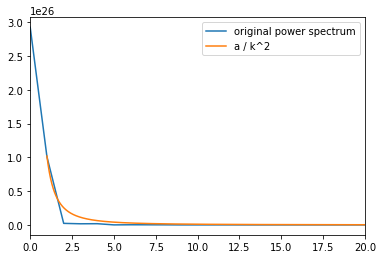

In [262]:
plt.plot(power_spectrum, label= 'original power spectrum')
plt.plot(z, normal/z**2, label= 'a / k^2')
plt.legend()
plt.xlim(0,20)
plt.show()

As we see the power spectrom seems to behave as k^02 with a scale factor.